# Loading the Data

In [2]:
import pandas as pd
df = pd.read_csv('ds_salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# Preparing the Data for Regression analysis

In [19]:
corre = df['salary'].corr(df['work_year'])
print("Corelation: " , corre)
groups = df.groupby('company_size')
for company_size, group_df in groups:
    # Print the company size and the number of rows in the group
    print("Company size:", company_size)
    print("Number of rows:", len(group_df))
summary = df.groupby('company_size').agg({'salary': 'median'})

# Print the summary statistics
print(summary)

Corelation:  -0.023675813981249266
Company size: L
Number of rows: 454
Company size: M
Number of rows: 3153
Company size: S
Number of rows: 148
                salary
company_size          
L             131300.0
M             140000.0
S              73000.0


In [12]:
df.mean()

C:\Users\user\AppData\Local\Temp\ipykernel_10076\3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


work_year          2022.373635
salary           190695.571771
salary_in_usd    137570.389880
remote_ratio         46.271638
dtype: float64

In [11]:
print(df.median())

work_year          2022.0
salary           138000.0
salary_in_usd    135000.0
remote_ratio          0.0
dtype: float64


C:\Users\user\AppData\Local\Temp\ipykernel_10076\4259369830.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.median())


In [13]:
df.std()

C:\Users\user\AppData\Local\Temp\ipykernel_10076\3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


work_year             0.691448
salary           671676.500508
salary_in_usd     63055.625278
remote_ratio         48.589050
dtype: float64

# Creating a Scatter Plot to Visualize Relation between Salaries_in_usd and work_year

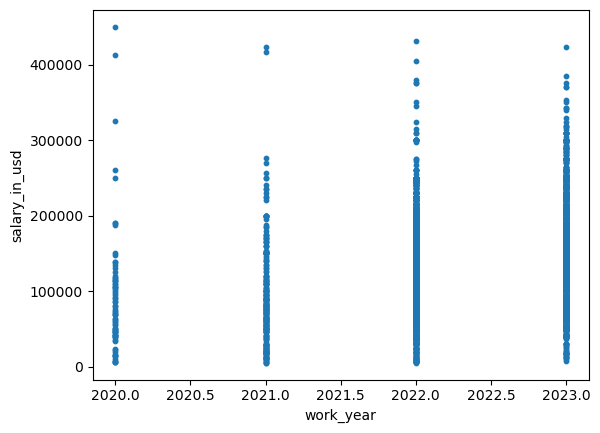

In [25]:
import matplotlib.pyplot as plt
x = df["work_year"]
y = df["salary_in_usd"]
plt.scatter(x,y, s = 10)
plt.xlabel("work_year")
plt.ylabel("salary_in_usd")
plt.show()

# Splitting the dataset into training and testing sets

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
x = np.array(x).reshape(-1,1)
y = np.array(y).reshape(-1,1)
print(x.shape)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)

(3755, 1)


# Fitting a Model into training data

In [27]:
result = LinearRegression()
result.fit(X_train,y_train)

LinearRegression()

# Predicting the Salaries of testing Data

In [28]:
y_pred = result.predict(X_test)

# Plotting the Regression Line

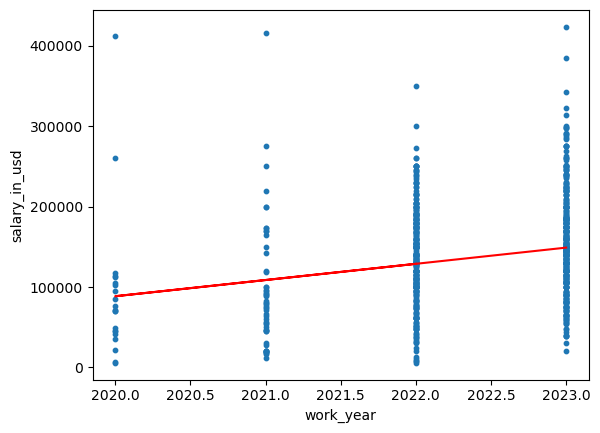

In [29]:
plt.scatter(X_test,y_test, s = 10)
plt.xlabel("work_year")
plt.ylabel("salary_in_usd")
plt.plot(X_test,y_pred, color = "r")
plt.show()